<a href="https://colab.research.google.com/github/datlt189/AI_LeTienDat_20146151/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [ ]:
folder = '/content/drive/MyDrive/FLOWER/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('ROSE'):
    output= 1.0
  if file.startswith('LOTUS'):
    output= 2.0
  if file.startswith('WATER LILY'):
    output= 3.0
  if file.startswith('APRICOT'):
    output= 4.0
  if file.startswith('DAISY'):
    output= 5.0
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [ ]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/data_train/flower_photos.npy', photos)
save('/content/drive/MyDrive/data_train/flower_photos.npy', labels)

(4317, 40, 40, 3) (4317,)


In [ ]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:
print(test_x.shape, train_x.shape)

(215, 40, 40, 3) (4102, 40, 40, 3)


In [ ]:
train_x = train_x.reshape((4102, 40, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((215, 40, 40, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,6)
test_y = to_categorical(test_y,6)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 40
classes = 6

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_809 (Conv2D)         (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_646 (LeakyReLU)  (None, 40, 40, 32)       0         
                                                                 
 max_pooling2d_450 (MaxPooli  (None, 20, 20, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_810 (Conv2D)         (None, 20, 20, 64)        18496     
                                                                 
 conv2d_811 (Conv2D)         (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_647 (LeakyReLU)  (None, 20, 20, 64)       0         
                                                     

In [ ]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)


Epoch 1/40
65/65 [==============================] - 4s 19ms/step - loss: 1.5895 - accuracy: 0.2830
Epoch 2/40
65/65 [==============================] - 1s 18ms/step - loss: 1.2526 - accuracy: 0.4644
Epoch 3/40
65/65 [==============================] - 1s 18ms/step - loss: 1.0549 - accuracy: 0.5566
Epoch 4/40
65/65 [==============================] - 1s 18ms/step - loss: 0.9228 - accuracy: 0.6273
Epoch 5/40
65/65 [==============================] - 1s 18ms/step - loss: 0.8765 - accuracy: 0.6533
Epoch 6/40
65/65 [==============================] - 1s 18ms/step - loss: 0.7649 - accuracy: 0.7060
Epoch 7/40
65/65 [==============================] - 1s 19ms/step - loss: 0.6436 - accuracy: 0.7530
Epoch 8/40
65/65 [==============================] - 1s 19ms/step - loss: 0.5285 - accuracy: 0.7945
Epoch 9/40
65/65 [==============================] - 1s 19ms/step - loss: 0.4757 - accuracy: 0.8245
Epoch 10/40
65/65 [==============================] - 1s 18ms/step - loss: 0.3490 - accuracy: 0.8718
Epoch 11/

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 24ms/step - loss: 190.6946 - accuracy: 0.8744
Test accuracy: 0.8744186162948608


In [ ]:
model.save('/content/drive/MyDrive/data_train/flowers.h5')

1/1 [==============================] - 0s 35ms/step
SUNFLOWER


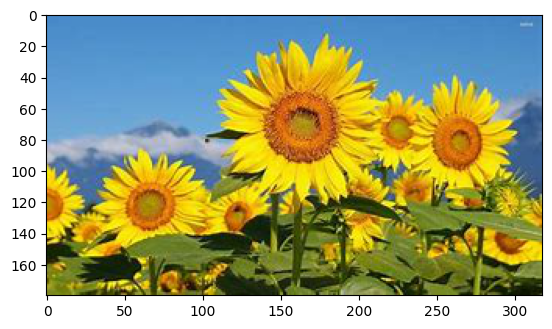

1/1 [==============================] - 0s 38ms/step
TULIP


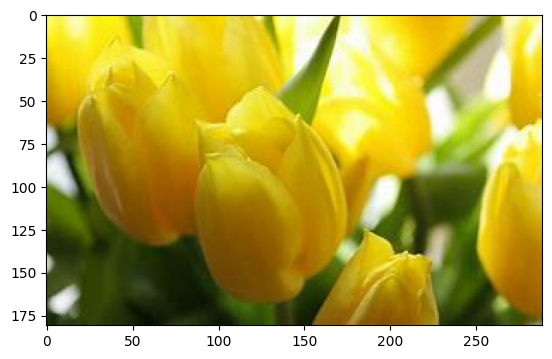

1/1 [==============================] - 0s 39ms/step
DANDELION


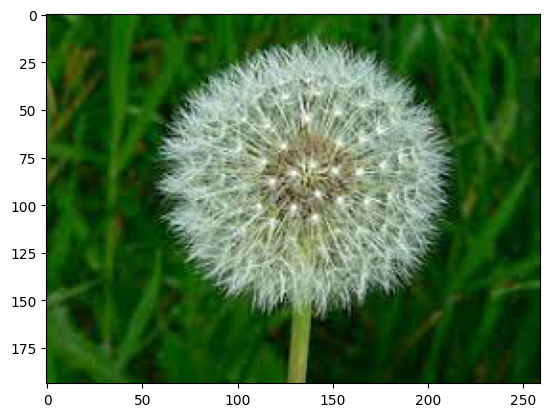

1/1 [==============================] - 0s 30ms/step
ROSE


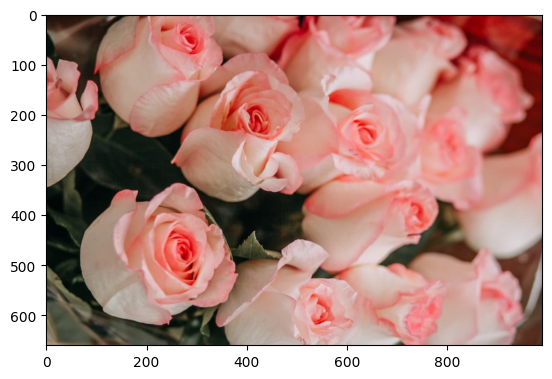

1/1 [==============================] - 0s 31ms/step
TULIP


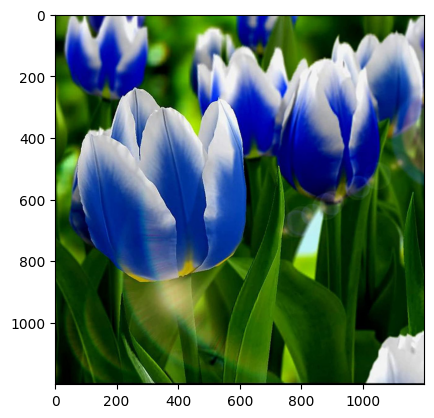

1/1 [==============================] - 0s 40ms/step
DAISY


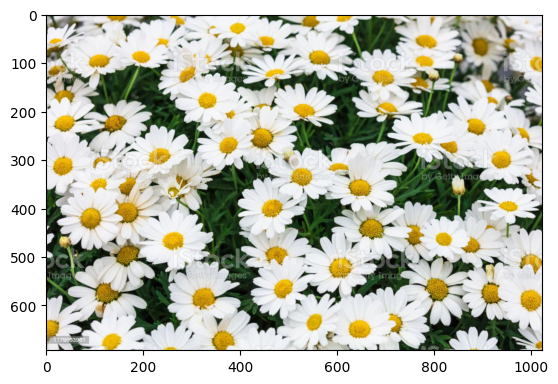

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/test_flower/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','ROSE', 'LOTUS', 'WATER LILY', 'APRICOT', 'DAISY']
  print(class_name[result])
  plt.show()